In [1]:
# Import my libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [4]:
# Load my data using Pandas
MyData = pd.read_csv('creditcard_2023.csv')

### Examine my data information and also the mathematical view 

In [5]:
# Preview my data with 5 rows
MyData.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
# Check the info of my data
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [13]:
# Check features datatype
MyData.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# Check the statistical measures 
MyData.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
# View my column names
MyData.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Data Cleaning 

In [9]:
# View the last 5 rows of my data
MyData.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [10]:
# Since the id column is the same as the index, I delete id column
MyData.drop('id',axis=1, inplace=True)

In [11]:
# Check for missung values in each columns 
MyData.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Explore the class column by checking the count of both fraudulent and authorized transactions
# Where 1 is for fraudulent transactions and 0 for authorized transactions
MyData['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='Class', ylabel='count'>

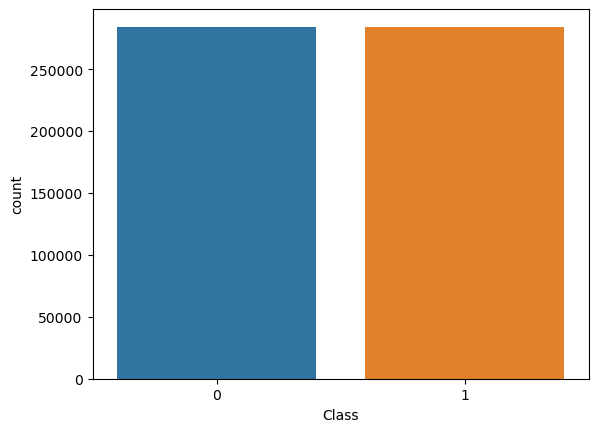

In [26]:
sns.countplot(x='Class', data=MyData)

<Axes: xlabel='Amount', ylabel='Density'>

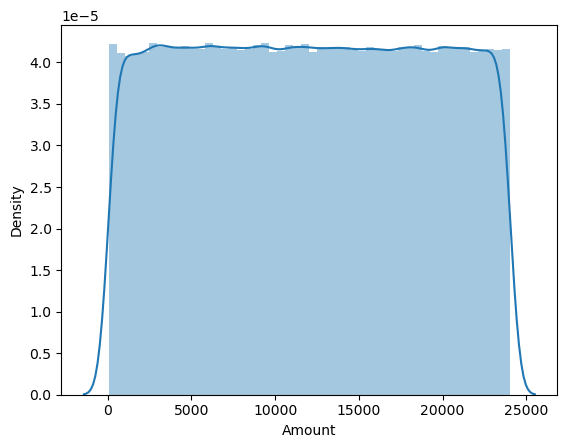

In [9]:
sns.distplot(MyData['Amount'])

In [ ]:
#My target is balance because they are evenly distributed
# I need to check the amount that was spent per each trasaction base off the class. Therefore I need to split my class
# column into fraud and authorized
Fraud = MyData[MyData['Class']==1]
Authorized = MyData[MyData['Class']==0]

In [36]:
# Investigate the information further for both Fraud and Authorized transactions 
Fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [37]:
Authorized.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

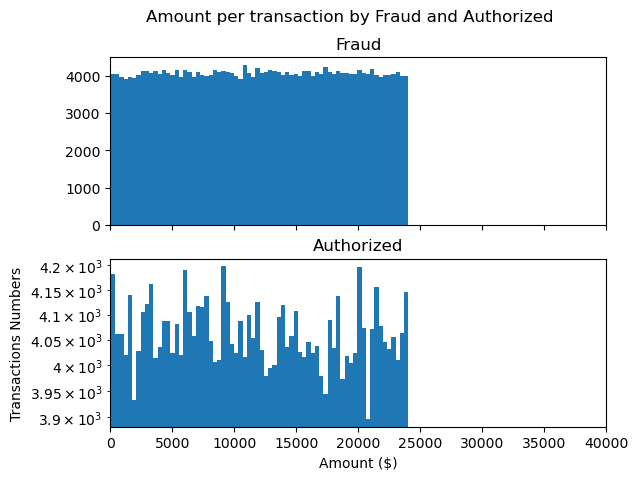

In [44]:
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True) 
fig.suptitle('Amount per transaction by Fraud and Authorized') 
axis1.hist(Fraud.Amount, bins = 70) 
axis1.set_title('Fraud') 
axis2.hist(Authorized.Amount, bins = 70)  
axis2.set_title('Authorized') 
plt.xlabel('Amount ($)') 
plt.ylabel('Transactions Numbers') 
plt.xlim((0, 40000)) 
plt.yscale('log')      

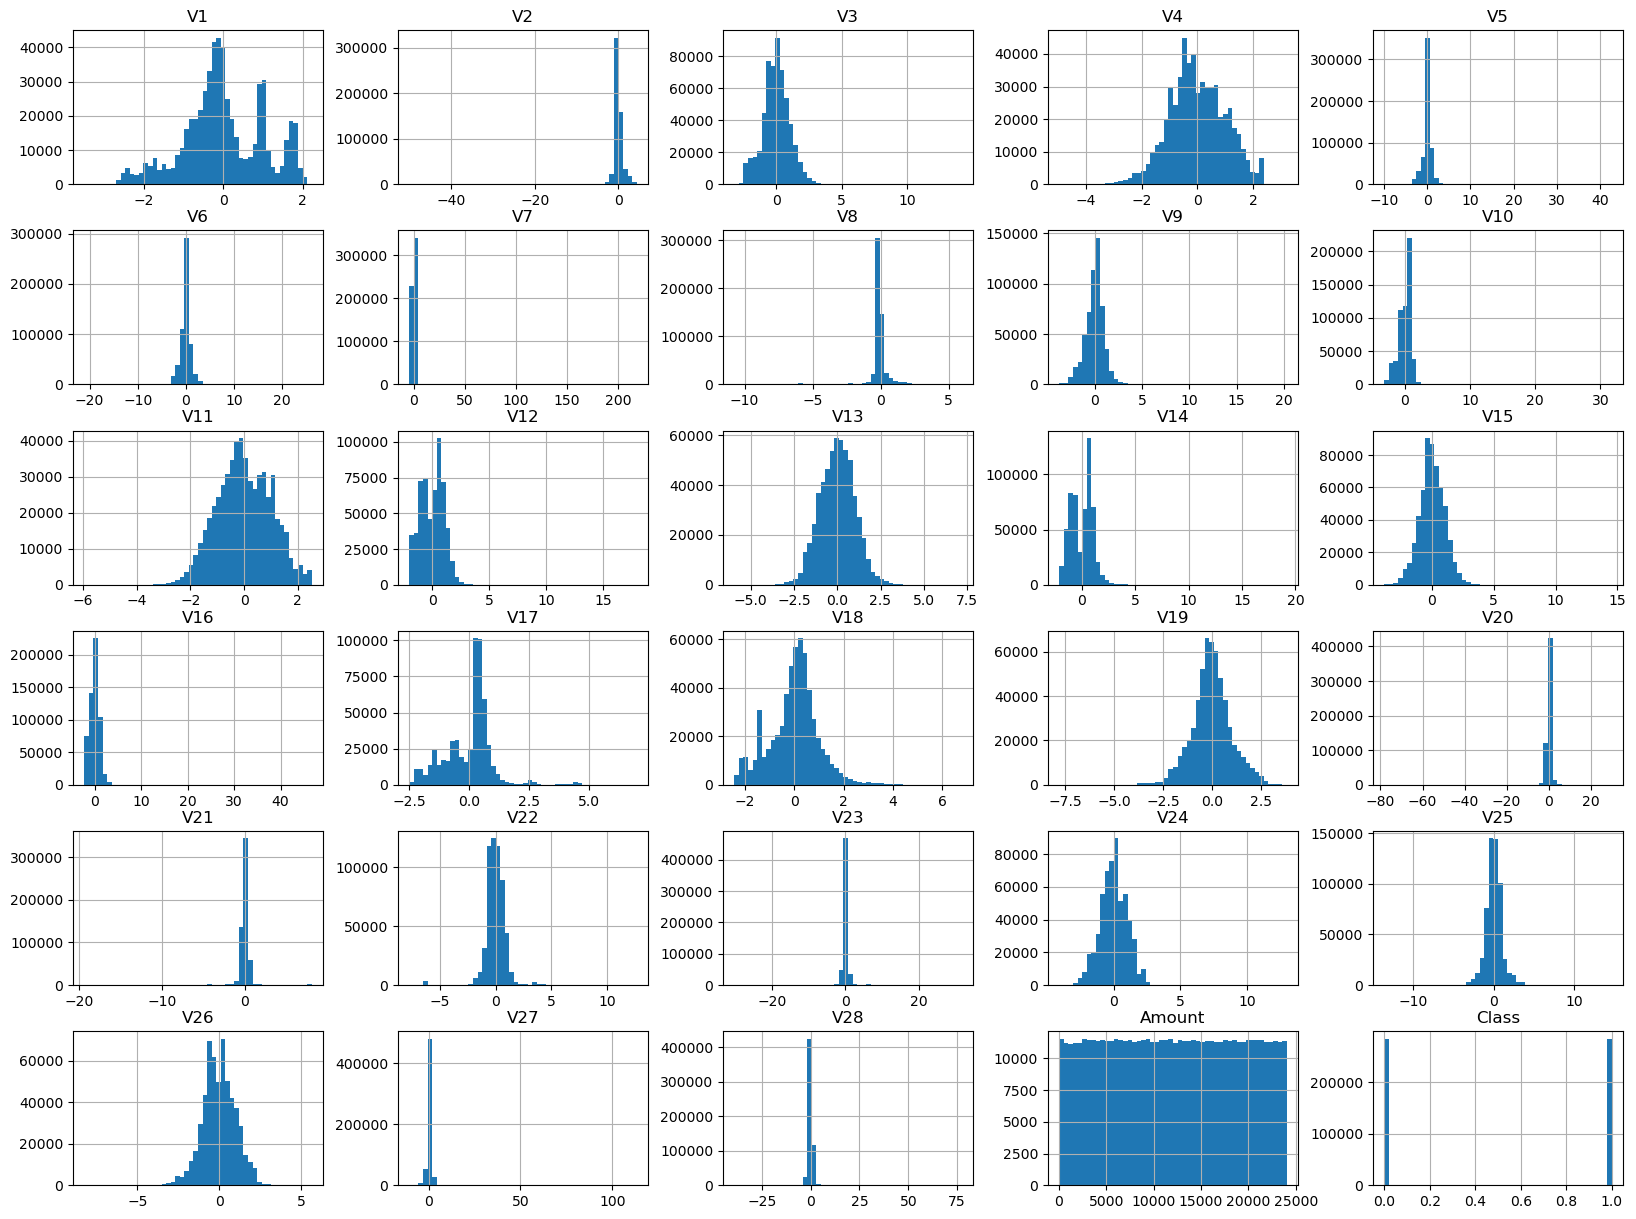

In [103]:
MyData.hist(figsize=(20, 15), bins=40);

[Text(0.5, 1.0, 'Correlation Matrix')]

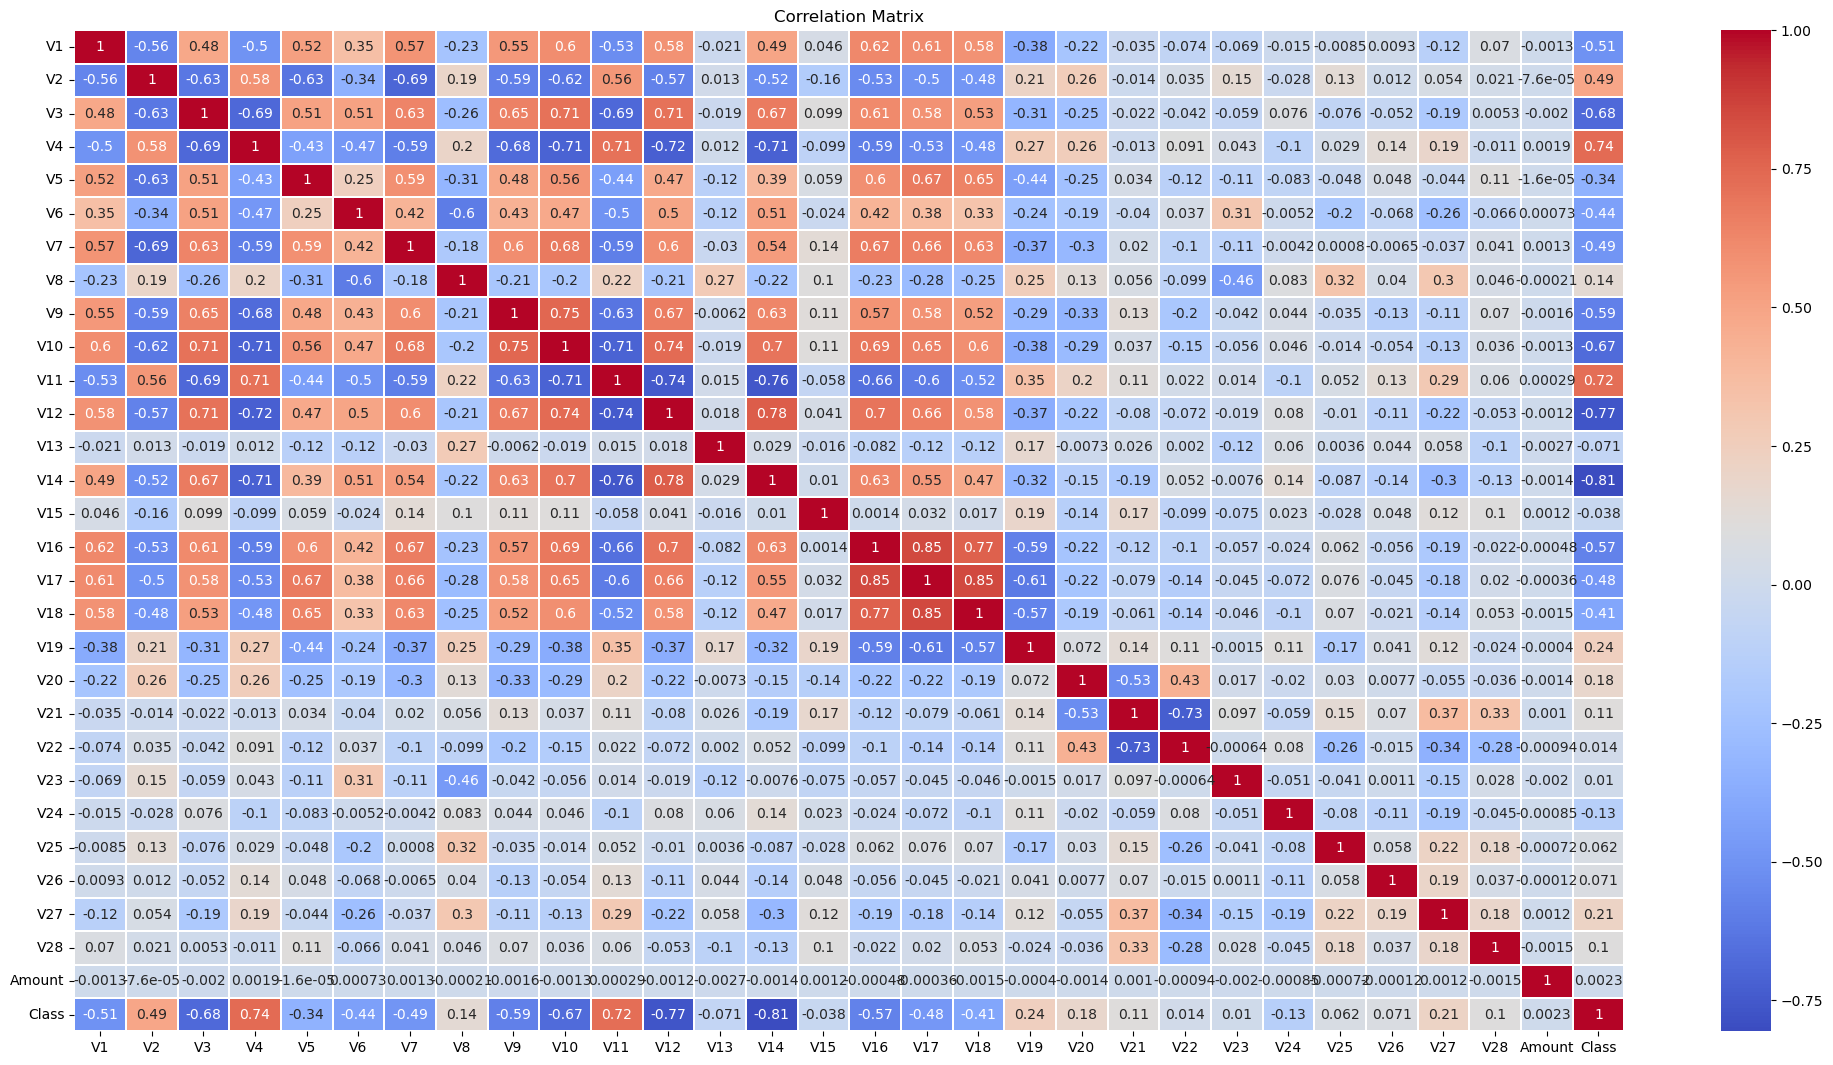

In [31]:
#correlation Matrix 
Data_corr = MyData.corr()
plt.figure(figsize=(25,13))
ass=sns.heatmap(Data_corr, annot=True, linewidths=0.1, cmap='coolwarm')
ass.set_ylim(sorted(ass.get_xlim(), reverse=True))
ass.set(title="Correlation Matrix")

### Model Training

In [5]:
# Splitting my Data into features and targets
X= MyData.drop(columns=['Class'], axis=1)
y= MyData['Class']

In [6]:
# Split my data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Logistic Regression Model

In [15]:
# Model training using Logistic Regression
model_lg= LogisticRegression()

In [16]:
#Training the logistic Regression Model with training Data
model_lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     85510
           1       0.73      0.92      0.81     85079

    accuracy                           0.79    170589
   macro avg       0.81      0.79      0.79    170589
weighted avg       0.81      0.79      0.79    170589





Text(0.5, 25.722222222222214, 'Predicted Value')

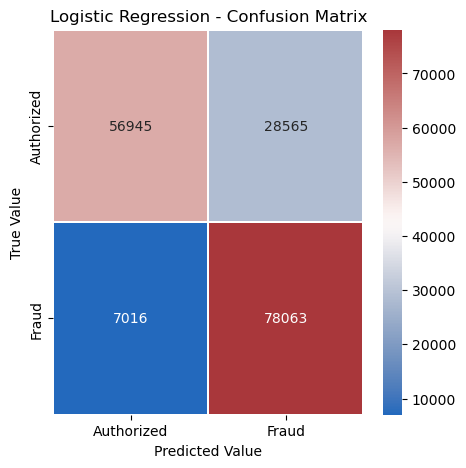

In [17]:
# Model evaluation with logistic Regression
train_pred = model_lg.predict(X_test)

print(classification_report(y_test,train_pred))
print('\n')
conf_matrix = confusion_matrix(y_test, train_pred)
plt.figure(figsize=(5, 5))
label_hp=['Authorized', 'Fraud']
sns.heatmap(pd.DataFrame(conf_matrix),annot=True, fmt='d',linewidths= 0.05 ,cmap='vlag',
            xticklabels= label_hp, yticklabels= label_hp)

plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 

#### Random Forest Classifier Model 

In [10]:
# Model training using Random Forest
model = RandomForestClassifier()

In [11]:
#Training the Random Forest Model with training Data
model.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85510
           1       1.00      1.00      1.00     85079

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589





Text(0.5, 25.722222222222214, 'Predicted Value')

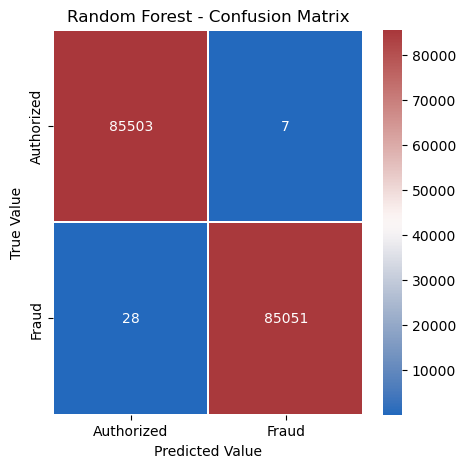

In [12]:
# My model evaluation with random forest
y_train_pred = model.predict(X_test)

print(classification_report(y_test, y_train_pred))
print('\n')
conf_matrix = confusion_matrix(y_test, y_train_pred)
plt.figure(figsize=(5, 5))
label_hp=['Authorized', 'Fraud']
sns.heatmap(pd.DataFrame(conf_matrix),annot=True, fmt='d',linewidths= 0.05 ,cmap='vlag',
            xticklabels= label_hp, yticklabels= label_hp)

plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 

#### Support Vector Machine Model 

In [8]:
svm_3 = SVC()
svm_3.fit(X_train,y_train)

SVC()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85510
           1       1.00      1.00      1.00     85079

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589





Text(0.5, 25.722222222222214, 'Predicted Value')

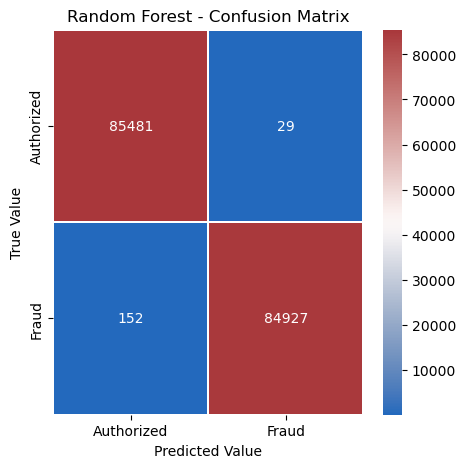

In [9]:
y_train_predd = svm_3.predict(X_test)
print(classification_report(y_test, y_train_predd))
print('\n')
conf_matrix = confusion_matrix(y_test, y_train_predd)
plt.figure(figsize=(5, 5))
label_hp=['Authorized', 'Fraud']
sns.heatmap(pd.DataFrame(conf_matrix),annot=True, fmt='d',linewidths= 0.05 ,cmap='vlag',
            xticklabels= label_hp, yticklabels= label_hp)

plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Value') 
plt.xlabel('Predicted Value')